In [1]:
%pip install pandas matplotlib
import pandas as pd

# Daten laden
df = pd.read_csv("netflix_titles.csv")

# Prüfen ob es geklappt hat
print("Erfolgreich geladen!")
df.head(2)

Erfolgreich geladen!


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [2]:
import pandas as pd
import matplotlib.pyplot as plt # Für Diagramme

# Daten laden
df = pd.read_csv("netflix_titles.csv")

# Erster Check (Wichtig für Daten-Qualität!)
print("Daten geladen. Form:", df.shape) # Zeigt Anzahl Zeilen/Spalten
df.head(5)

Daten geladen. Form: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Checken, wo Daten fehlen
print(df.isnull().sum())

# Entscheidung: Wir löschen Zeilen, wo wichtige Infos fehlen
# (inplace=True speichert es direkt im df, ohne dass wir "df =" schreiben müssen)
df.dropna(subset=["date_added", "rating"], inplace=True)

# Datums-Format fixen (String -> Datumsobjekt)
# Das ist wichtig, um nach Jahren zu sortieren!
df["date_added"] = pd.to_datetime(df["date_added"].str.strip())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


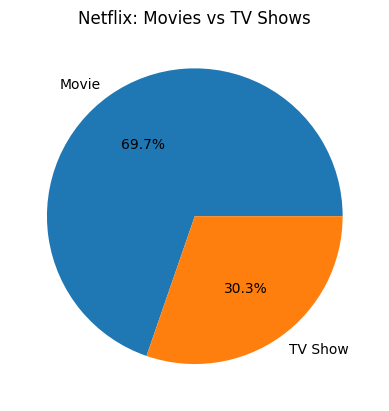

In [4]:
# Wir zählen die Spalte "type"
types = df["type"].value_counts()

# Wir malen ein Tortendiagramm (Pie Chart)
types.plot(kind='pie', autopct='%1.1f%%', title='Netflix: Movies vs TV Shows')
plt.ylabel('') # Versteckt das hässliche Label an der Seite
plt.show()

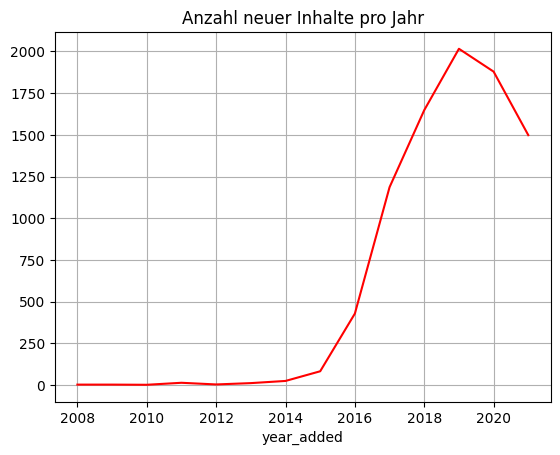

In [5]:
# Wir holen uns nur das JAHR aus dem Datum (z.B. 2019 aus 2019-09-25)
df["year_added"] = df["date_added"].dt.year

# Wir zählen: Wie viele Inhalte gab es pro Jahr?
# .sort_index() ist wichtig, damit die Jahre (2010, 2011...) in der richtigen Reihenfolge sind
growth = df["year_added"].value_counts().sort_index()

# Liniendiagramm zeichnen
growth.plot(kind='line', color='red', title='Anzahl neuer Inhalte pro Jahr')
plt.grid() # Gitterlinien für bessere Lesbarkeit
plt.show()